## Week_16 HW

## 1.Perform combined over and undersampling on the diabetes dataset (use SMOTEENN). Explain how combined sampling works.

#### What is SMOTE-ENN?

**SMOTE-ENN (Synthetic Minority Oversampling Technique - Edited Nearest Neighbors)**

* Its a hybrid sampling method. Combination of both oversampling and undersampling.
* SMOTE performs oversampling, ENN performs undersampling

#### How it works?

1. Choose minority class as an input. (**SMOTE starts here**)
2. Find its K-Nearest Neighbors.
3. Generate new samples with the help of interpolation between nearest samples.
4. Repeat the steps 2 & 3 until data is rebalanced. (**SMOTE ends here**)
5. Determine K value. Default K value is 3 (**ENN starts here**)
6. Find the K nearest Neighbors for the new observation and return the majority class from the neighbors.
7. ENN removes some observations from both classes, if different class identified between observation's class and its K nearest Neighbor's majority class.
8. Repeat the steps 6 & 7 until data is rebalanced. (**ENN ends here**) 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, balanced_accuracy_score,ConfusionMatrixDisplay,classification_report,precision_score,recall_score
from imblearn.combine import SMOTEENN
from imblearn.metrics import classification_report_imbalanced

In [3]:
pima_df = pd.read_csv('../SupervisedML_13/diabetes.csv')
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# making sure our dataset contains any nulls
pima_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#checking 0s and 1s count in outcome column
pima_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Goal

* Creating a Machine Learning model to predict a person is having diabetes or not based on the input features.

In [6]:
X = pima_df.drop('Outcome',axis=1)
y = pima_df['Outcome']

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 6)

#standardization
sc = StandardScaler()
X_tr_scaler = sc.fit_transform(X_train)
X_te_scaler = sc.fit_transform(X_test)

#using counter to see before and after count of minority and majority classes
counter = Counter(y_train)
print("Before",counter)

#rebalancing data using SMOTE-ENN
resample = SMOTEENN(random_state = 6)
X_smote, y_smote = resample.fit_resample(X_tr_scaler,y_train)

counter = Counter(y_smote)
print("After",counter)

Before Counter({0: 347, 1: 190})
After Counter({1: 212, 0: 193})


* I have performed SMOTE-ENN to the diabetes dataset and printed the majority and minority classes count before and after resampling. After resampling our majority(0 class) and minority(1 class) class count are almost equal.

## 2.Perform logistic regression with the new data from step 1. 

In [7]:
# fitting the model
LR = LogisticRegression(random_state = 6)
LR.fit(X_smote, y_smote)

# predicting the output
y_pred = LR.predict(X_te_scaler)

print(classification_report_imbalanced(y_test, y_pred))
print("Accuracy Score after SMOTE-ENN: ", balanced_accuracy_score(y_test,y_pred).round(2)*100,'%')
cm = confusion_matrix(y_test, y_pred)
print("No. of False Negatives from Logistic Regression with SMOTE-ENN is",cm[1,0])

                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.68      0.77      0.76      0.72      0.52       153
          1       0.55      0.77      0.68      0.64      0.72      0.53        78

avg / total       0.75      0.71      0.74      0.72      0.72      0.52       231

Accuracy Score after SMOTE-ENN:  72.0 %
No. of False Negatives from Logistic Regression with SMOTE-ENN is 18


In [12]:
# predicting probabilities
y_pred_prob = LR.predict_proba(X_te_scaler)

## Comment on the performance of combined sampling vs the other approaches we have used for the diabetes dataset.


We have performed the following methods:

    * KNN Classification
    * LogisticRegression	
    * Logistic Regression after SMOTE
    * Logistic Regression after SMOTE-ENN
    
    Comparing performance 

|       metrics        | KNN Method |LogisticRegression|LogisticRegression after SMOTE|LogisticRegression afterSMOTE-ENN|
|:--------------------:|:----------:|:----------------:|:----------------------------:|:-------------------------------:|
| RECALL score         |  59%       |     52%          |                 67%          |        77%                      |
| No.of FalseNegatives |  33        |     43           |                 27           |        18                       |



* Since diabetes is a disease, I took recall score and number of False Negatives as my performance metric. Compare to other methods we used, SMOTE-ENN gave good recall score and less False Negatives. So if the data is in imbalance, resampling will give us good prediction. Combined sampling performed well than other methods.

## 3.Create an ROC Curve for the model and calculate the AUC. Explain what the ROC Curve shows and what the resulting AUC means.

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

# roc curve for model
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
 
# auc score
print("AUC score",roc_auc_score(y_test,y_pred_prob).round(2))   

AUC score 0.8


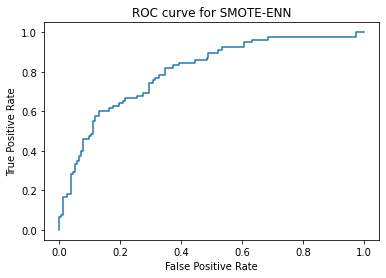

In [51]:
# we can plot our roc curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for SMOTE-ENN")
plt.show()

### Explanation from ROC curve and AUC score

* **Perfect test ROC curve hugs along the left handed side and goes horizontally across the top**. If curve looks like a diagonal line that cuts across the middle then that is an useless test.


* Definitely our ROC curve is not the worst test since it is not a diagonal line. It hugs along left handed side and goes horizontally to the top. So it is a better test method.


* Area Under ROC curve(AUC) is a measure of **ability of a classifier to distinguish between classes**. 
      * If AUC = 1 then its a perfect model.
      * If 0.5 < AUC < 1 then classifier can distinguish the positive class from negative class well.
      * If AUC < 0.5 then its poor model. It might classified positive class as negative and vice verse.
       
* We got our AUC is 0.8. So model predicted 0s as 0 and 1s as 1 well.

## 4. What is outlier detection? Why is it useful? What methods can you use for outlier detection?

#### Outlier 

* An outlier is an unusual data point that differes from other points. 
* An outlier is a point that will be outside the range of other points in the feature.

#### Outlier Detection & Why is it useful?

* Detecting outliers in a training dataset is called Outlier Detection. Outliers are very important because they affect the mean and median which in turn affects the error (absolute and mean) in any data set. Outliers increase the variability in our data, which decreases statistical power. 

#### Novelty Detection

* Detecting outliers in an unseen data is called Novelty Detection.

#### Anomaly Detection

* When we combine both outlier and novelty detection then it is called Anomaly Detection.

#### Methods to find Outlier

* Simplest method to find outlier is by plotting the datas using **scatterplot, boxplot or sometimes histogram** .

* Using IQR: **Points that are above or below 1.5 times the IQR(Inter Quartile Range i.e Q3-Q1)** are suspected as possible outliers.

* Isolation Forest Algorithm : **It detects anomalies using isolation( how far a data is to the rest of other data)**.

* Using Z score 

* DBScan(Density Based Spatial Clustering of Applications with Noise)

* Local Outlier Factor(LOF) algorithm

## 5. Perform a linear SVM to predict credit approval (last column) using this dataset: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29 . Make sure you look at the accompanying document that describes the data in the dat file. You will need to either convert this data to another file type or import the dat file to python. 


#### Goal:
Creating a machine learning model that can predict if an individual’s application for a credit card will be accepted or not.

In [11]:
header_list = ['A1', 'A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15']
credit_df= pd.read_csv('australian.dat',sep=' ',names=header_list)
credit_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [12]:
credit_df['A15'].value_counts()

0    383
1    307
Name: A15, dtype: int64

In [13]:
credit_df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
dtype: int64

* Performing LinearSVC to the credit dataframe

Accuracy Score from LinearSVC:  85.0 %
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       105
           1       0.81      0.89      0.85       102

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



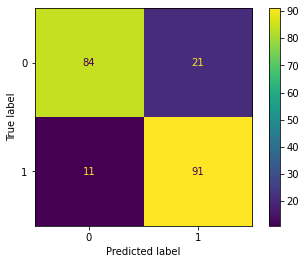

In [23]:
X = credit_df.drop(['A15'],axis = 1)
y = credit_df['A15']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 6)

# standardization
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

# fitting Linear SVC model
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train_scale, y_train)

# making predictions based on training data
y_pred = svm.predict(X_test_scale)

# finding accuracy score 
print("Accuracy Score from LinearSVC: ",svm.score(X_test_scale,y_test).round(2)*100,'%' )

#printing confusion matrix and classification report
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
print(classification_report(y_test,y_pred))

#### How did the SVM model perform? 

* I have finished LinearSVC machine learning model to predict if a person’s application for a credit card would get approved or not given some information about that person.

* We got good Accuracy score, recall, precison. So we can say Linear SVC model performed well


## 6. What kinds of jobs in data are you most interested in? Do some research on what is out there. Write about your thoughts in under 400 words. 

Related to DataScience track, we have more job roles. 

   * Data Scientist
   * Data Analyst
   * Data Engineer
   * Data Architect
   * Machine Learning Scientist
   * Machine Learning Engineer
   * Database Administrator

* I am new to tech field. Data Science track is my first exposure in technology. I liked when I played around with the datas like collecting a bunch of data and do data cleaning, transformation and maintaining. So I would be more fit in **DATA ENGINEER** role. I had very much interested while I was working with time series analysis. I think we can find forecasting also in Data Engineer role. I never say no to my carrier, so even If I get any other role also I will try to build myself more efficient to fulfil my job duties. 


* My next dream role is Data Scientist. My assumption to the data scientist role is little more advanced like developing new algorithms. So as a beginner I would like to work as a data engineer. Once I gained experience and knowledge, may be I can try for data scientist role.( Mentors please correct me if I am wrong about the roles and responsibilities.)


* Machine Learning concepts are very interesting such as Creating a model, fitting the model and explaining performance of the model. Variety of performance metrics to understand. I am having confidence that I can perform well on various concepts of ML. So **DATA ENGINEER** and **MACHINE LEARNING ENGINEER** are the roles that I am very much interested in.

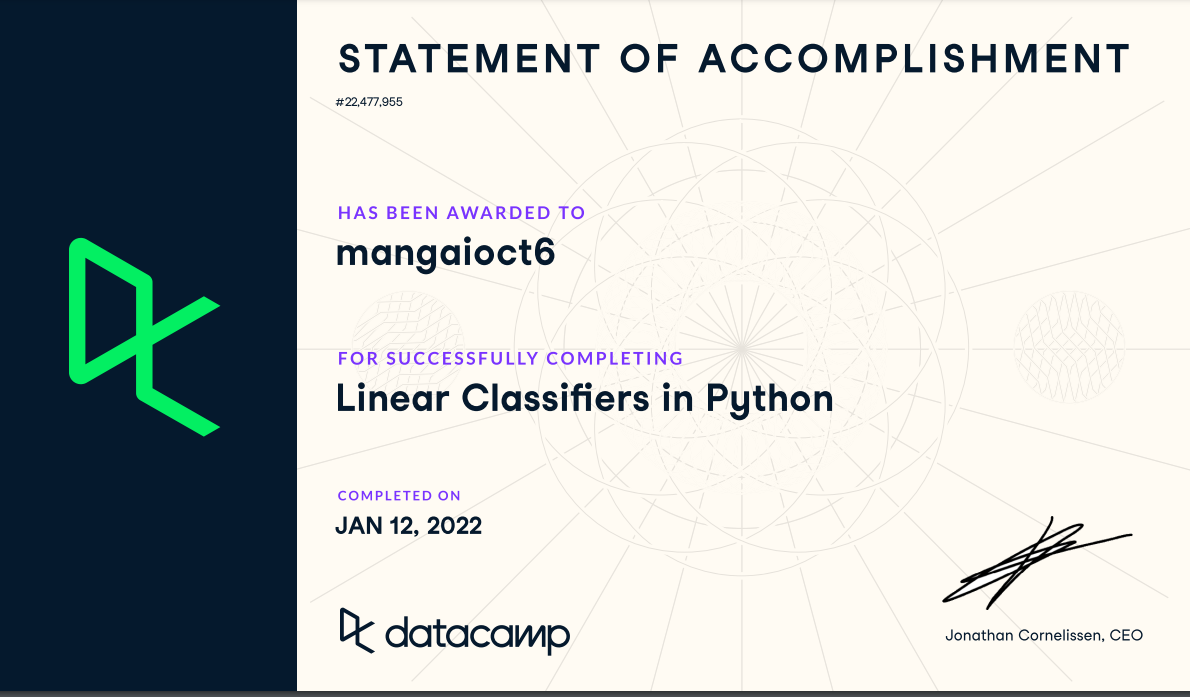

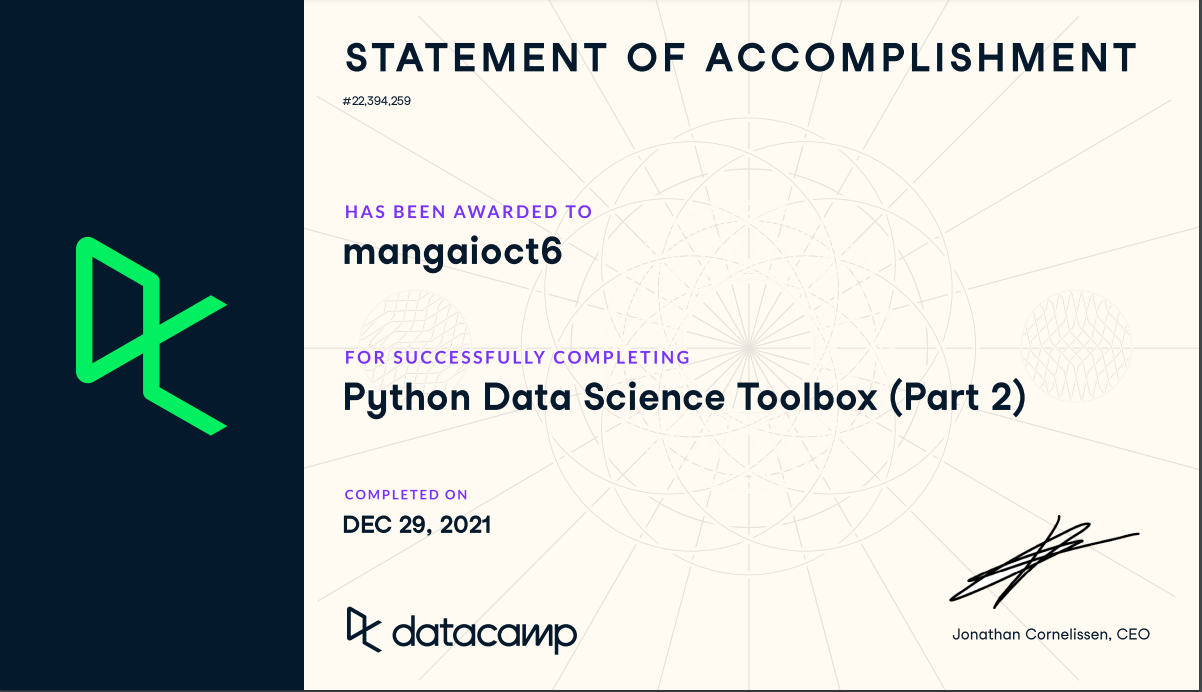